# 搭建最小的神經網路

Keras官方文檔：https://keras.io/api/

---

# 匯入函式庫

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

# 建立訓練資料

建立資料

In [2]:
train_num = 800
x_train = np.random.rand(train_num) * 2 - 1
y_train = x_train * -1
val_num = 200
x_val = np.random.rand(val_num) * 2 - 1
y_val = x_val * -1

圖表顯示資料

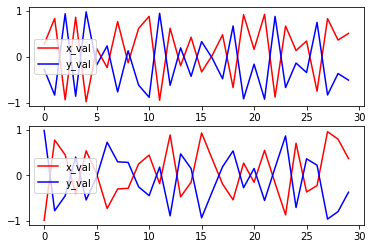

In [3]:
plt.subplot(211)
plt.plot(x_train[:30], color='r', label='x_val')
plt.plot(y_train[:30], color='b', label='y_val')
plt.legend()
plt.subplot(212)
plt.plot(x_val[:30], color='r', label='x_val')
plt.plot(y_val[:30], color='b', label='y_val')
plt.legend()
plt.show()

# 建立神經網路模型

Keras官方文檔 - layers API：https://keras.io/api/layers/

In [4]:
model = tf.keras.models.Sequential([
  layers.Input(shape=(1,)),
  layers.Dense(1, activation="linear", kernel_initializer="RandomUniform")
  # layers.Dense(1, activation="relu", kernel_initializer="he_uniform")
  # layers.Dense(1, activation="tanh", kernel_initializer="glorot_uniform")
])
model.compile(optimizer="adam", loss="mse")

查看模型結構

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


查看模型圖形化結構

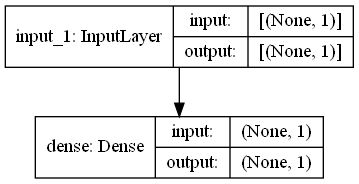

In [6]:
plot_model(model, show_shapes=True)

查看訓練前的權重

In [7]:
model.get_weights()

[array([[-0.01961516]], dtype=float32), array([0.], dtype=float32)]

# 訓練參數設定

Keras官方文檔 - ModelCheckpoint：https://keras.io/api/callbacks/model_checkpoint/

In [8]:
callbacks = []

''' EarlyStopping '''
callbacks.append(
  keras.callbacks.EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
)

''' Param '''
batch_size = 32
epochs = 10000

# 開始訓練

In [9]:
trainHistory = model.fit(
  x_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  validation_data=(x_val, y_val),
  callbacks=callbacks
)

Epoch 1/10000
25/25 [==============================] - 1s 8ms/step - loss: 0.3141 - val_loss: 0.2936
Epoch 2/10000
25/25 [==============================] - 0s 3ms/step - loss: 0.2980 - val_loss: 0.2791
Epoch 3/10000
25/25 [==============================] - 0s 3ms/step - loss: 0.2828 - val_loss: 0.2647
Epoch 4/10000
25/25 [==============================] - 0s 3ms/step - loss: 0.2681 - val_loss: 0.2511
Epoch 5/10000
25/25 [==============================] - 0s 3ms/step - loss: 0.2541 - val_loss: 0.2375
Epoch 6/10000
25/25 [==============================] - 0s 3ms/step - loss: 0.2405 - val_loss: 0.2251
Epoch 7/10000
25/25 [==============================] - 0s 3ms/step - loss: 0.2276 - val_loss: 0.2133
Epoch 8/10000
25/25 [==============================] - 0s 3ms/step - loss: 0.2152 - val_loss: 0.2014
Epoch 9/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2033 - val_loss: 0.1905
Epoch 10/10000
25/25 [==============================] - 0s 3ms/step - loss: 0.1920 - val_lo

# 訓練結果

查看訓練後的權重變化

In [10]:
model.get_weights()

[array([[-0.9999995]], dtype=float32), array([1.2105241e-09], dtype=float32)]

圖表顯示訓練時Loss曲線變化

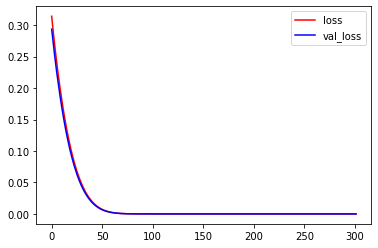

In [11]:
plt.plot(trainHistory.history['loss'], color='r', label='loss')
plt.plot(trainHistory.history['val_loss'], color='b', label='val_loss')
plt.legend()
plt.show()

建立測試資料

In [20]:
num = 1000
x_test = np.random.rand(num) * 2 - 1
y_test = x_test * -1

使用模型進行評估

In [13]:
model.evaluate(x_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0000e+00


0.0

使用模型進行預測

In [14]:
predicted = model.predict(x_test)

圖表顯示預測結果

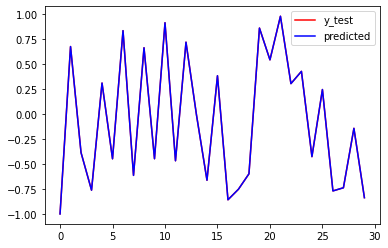

In [15]:
plt.plot(y_test[:30], color='r', label='y_test')
plt.plot(predicted[:30], color='b', label='predicted')
plt.legend()
plt.show()

列表顯示預測結果

In [16]:
for i in range(10):
  print(f'{i}. y_test = {y_test[i]:13.10f},  predicted = {predicted[i, 0]:13.10f},  ads_diff = {abs(predicted[i, 0] - y_test[i]):12.10f}')

0. y_test = -0.9960862299,  predicted = -0.9960857630,  ads_diff = 0.0000004669
1. y_test =  0.6760458396,  predicted =  0.6760455370,  ads_diff = 0.0000003026
2. y_test = -0.3834303000,  predicted = -0.3834301233,  ads_diff = 0.0000001767
3. y_test = -0.7589095953,  predicted = -0.7589092255,  ads_diff = 0.0000003698
4. y_test =  0.3114329291,  predicted =  0.3114327788,  ads_diff = 0.0000001503
5. y_test = -0.4454658168,  predicted = -0.4454655945,  ads_diff = 0.0000002223
6. y_test =  0.8349207781,  predicted =  0.8349203467,  ads_diff = 0.0000004314
7. y_test = -0.6112354088,  predicted = -0.6112350821,  ads_diff = 0.0000003266
8. y_test =  0.6640654210,  predicted =  0.6640651226,  ads_diff = 0.0000002984
9. y_test = -0.4447667077,  predicted = -0.4447664917,  ads_diff = 0.0000002160
